1. Carga y Exploración de Datos:

Cargar el dataset y revisar su estructura básica.
Describir las variables y su distribución.
Identificar y tratar valores nulos y outliers.


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer

# Cargar el dataset
df = pd.read_csv("../Data/winequality-red.csv", delimiter=';', encoding='utf-8')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
fixed acidity,7.4000,7.8000,7.800,11.200,7.4000,7.4000,7.9000,7.3000,7.8000,7.5000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000,0.6600,0.6000,0.6500,0.5800,0.5000
citric acid,0.0000,0.0000,0.040,0.560,0.0000,0.0000,0.0600,0.0000,0.0200,0.3600
residual sugar,1.9000,2.6000,2.300,1.900,1.9000,1.8000,1.6000,1.2000,2.0000,6.1000
chlorides,0.0760,0.0980,0.092,0.075,0.0760,0.0750,0.0690,0.0650,0.0730,0.0710
free sulfur dioxide,11.0000,25.0000,15.000,17.000,11.0000,13.0000,15.0000,15.0000,9.0000,17.0000
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000,40.0000,59.0000,21.0000,18.0000,102.0000
density,0.9978,0.9968,0.997,0.998,0.9978,0.9978,0.9964,0.9946,0.9968,0.9978
pH,3.5100,3.2000,3.260,3.160,3.5100,3.5100,3.3000,3.3900,3.3600,3.3500
sulphates,0.5600,0.6800,0.650,0.580,0.5600,0.5600,0.4600,0.4700,0.5700,0.8000


In [2]:
# Exploración inicial
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.00000

Descripción de las variables:

Acidez fija: Acidez no volátil en el vino.
Acidez volátil: Acidez que se evapora a baja temperatura.
Ácido cítrico: Un compuesto ácido natural en el vino.
Azúcar residual: Azúcar que permanece después de la fermentación.
Cloruros: Compuestos que indican salinidad en el vino.
Dióxido de azufre libre: Componente utilizado como conservante.
Dióxido de azufre total: Total de dióxido de azufre en el vino.
Densidad: Masa por unidad de volumen.
pH: Medida de acidez o alcalinidad.
Sulfatos: Compuestos que afectan el sabor y la calidad.
Alcohol: Porcentaje de alcohol en el vino.
Calidad: Clasificación del vino en una escala del 0 al 10.

Valores nulos:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Duplicados antes de eliminar: 240
Duplicados después de eliminar: 0


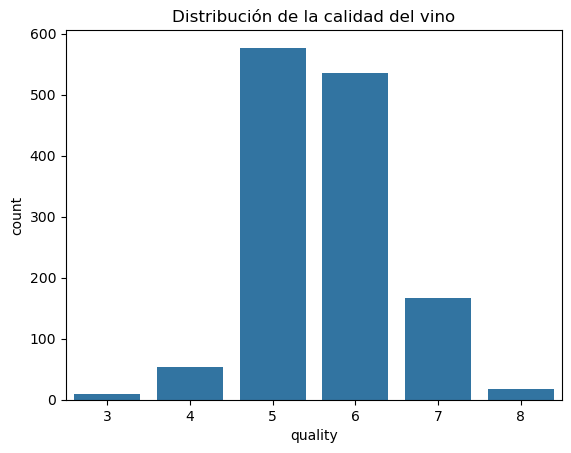

In [3]:
# Identificar valores nulos
print("Valores nulos:\n", df.isnull().sum())
# Identificación y eliminación de duplicados
print("Duplicados antes de eliminar:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicados después de eliminar:", df.duplicated().sum())
# Visualización de distribuciones de la calidad del vino
sns.countplot(x='quality', data=df)
plt.title("Distribución de la calidad del vino")
plt.show()

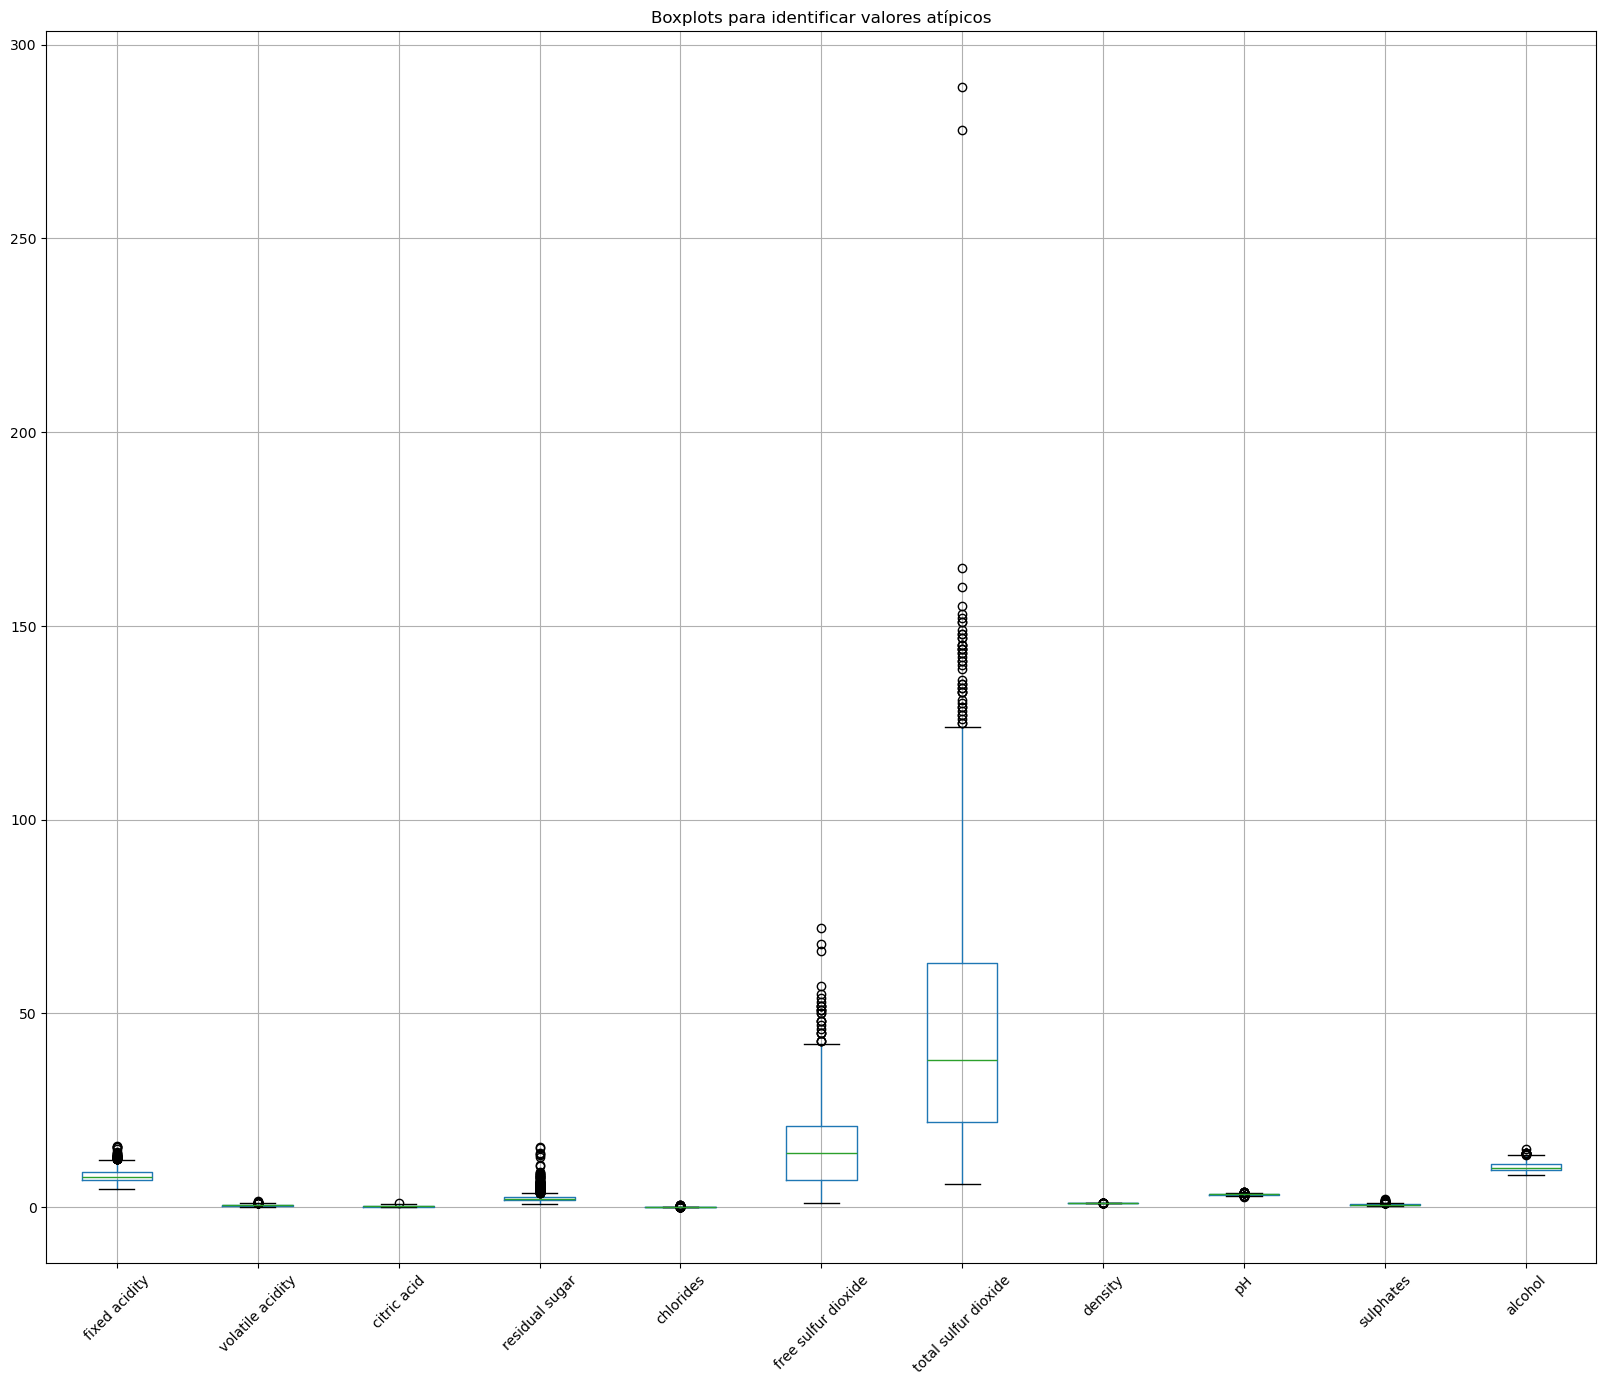

In [4]:
# Identificar valores atípicos
plt.figure(figsize=(20, 16))

# Elimina la columna 'quality' solo para este análisis
df_sin_quality = df.drop('quality', axis=1)

# Crea los boxplots
df_sin_quality.boxplot(rot=45)
plt.title("Boxplots para identificar valores atípicos")
plt.show()

In [ ]:
#Se encontraron bastantes valores atipicos que se corregiran usando rango intercuartilico para las caracteristicas

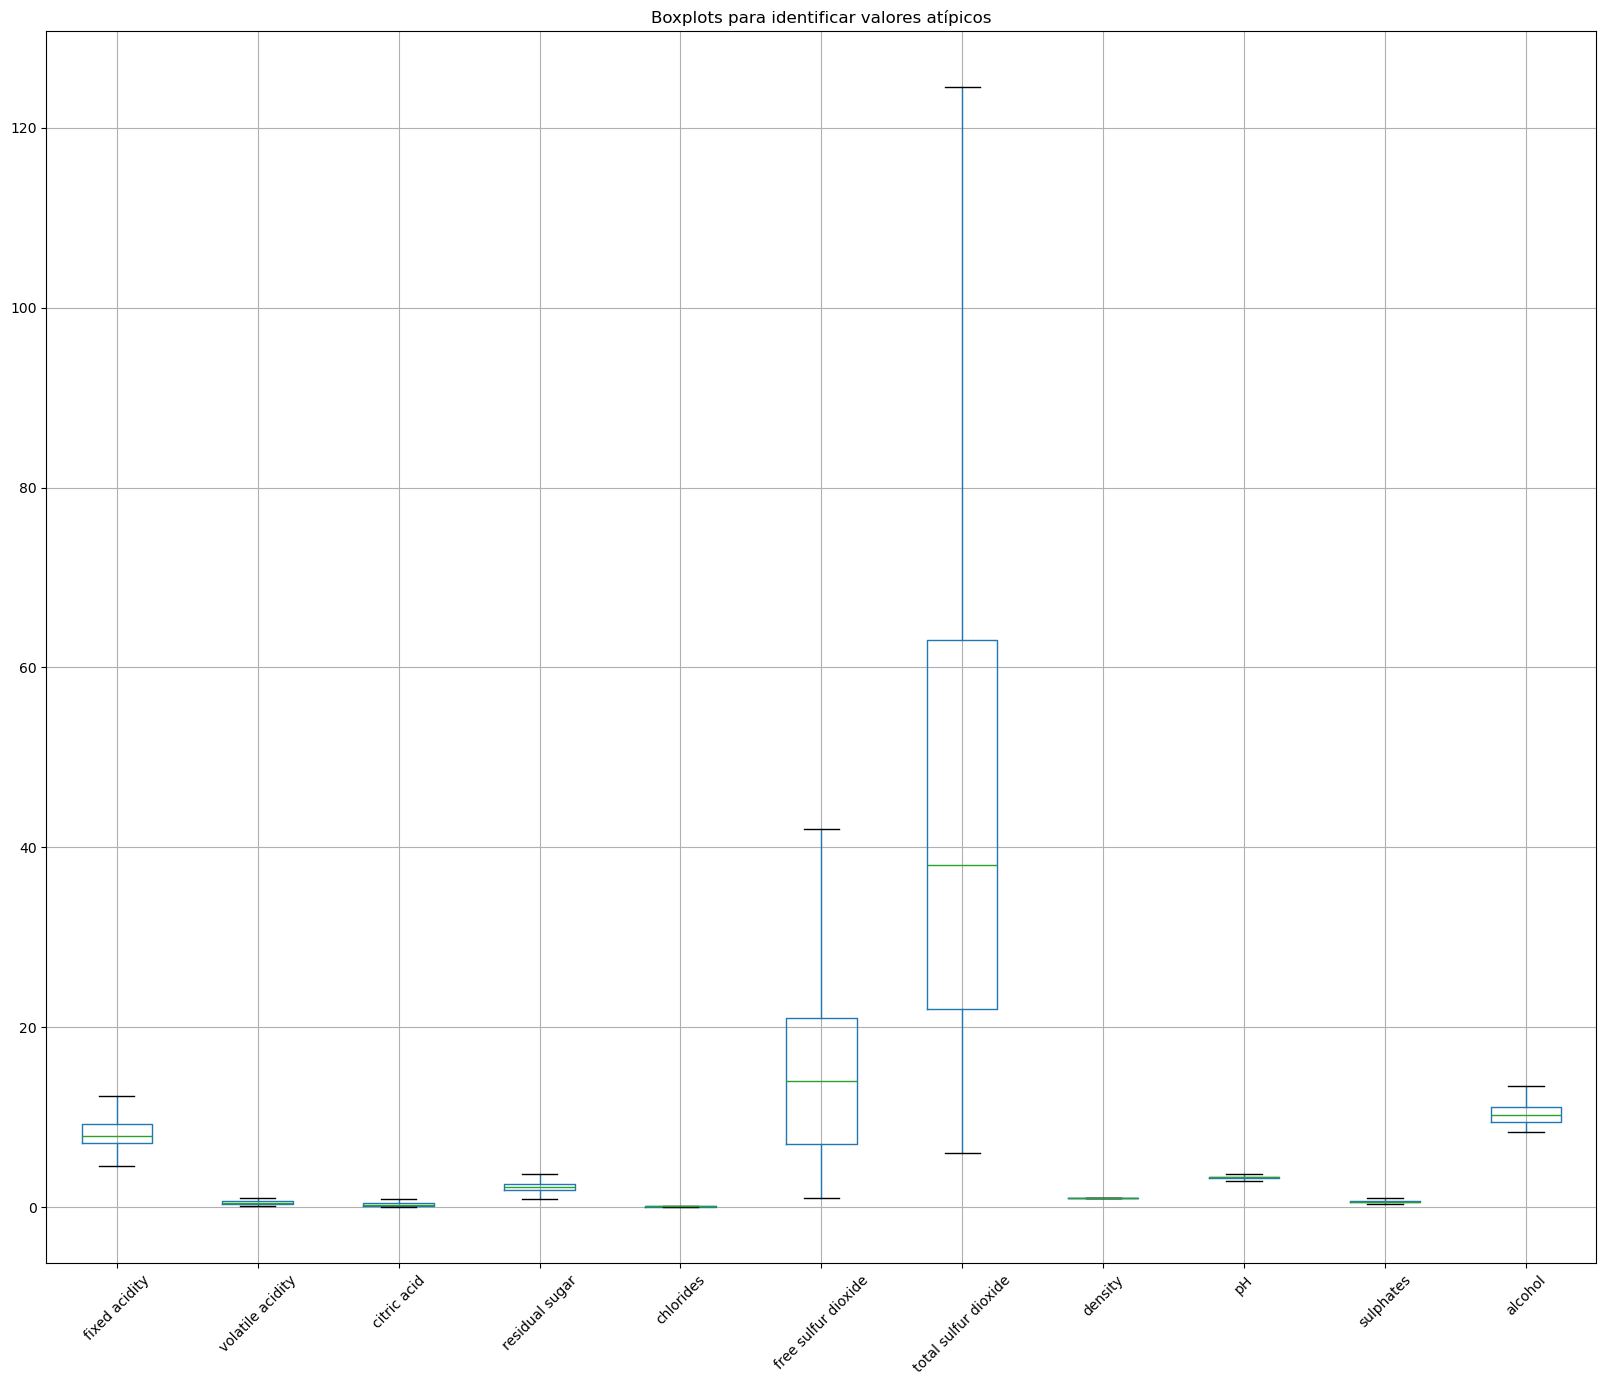

In [5]:
# Manejo de valores atípicos usando el rango intercuartílico (IQR)
def eliminar_atipicos_iqr(data, column):
    # Calcular Q1, Q3 y el rango intercuartílico (IQR)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    # Definir límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Reemplazar valores por los límites cuando estén fuera del rango
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Aplicar la corrección para cada columna numérica
for col in df.select_dtypes(include=np.number).columns:
    eliminar_atipicos_iqr(df, col)

# Verificar los cambios con gráficos de caja (boxplots)
plt.figure(figsize=(20, 16))

# Elimina la columna 'quality' solo para este análisis
df_sin_quality = df.drop('quality', axis=1)

# Crea los boxplots
df_sin_quality.boxplot(rot=45)
plt.title("Boxplots para identificar valores atípicos")
plt.show()

2. Preprocesamiento de Datos:

Seleccionar características importantes para la clasificación.
Transformar variables categóricas en variables numéricas si es necesario.
Dividir los datos en conjuntos de entrenamiento y prueba.
Escalar las características.

In [13]:


# Agrupar la calidad en categorías
df['quality'] = pd.to_numeric(df['quality'], errors='coerce')
df['quality'] = df['quality'].apply(lambda x: 'Low' if x <= 5 else ('Medium' if x <= 7 else 'High'))

# Separar variables predictoras y objetivo
X = df.drop('quality', axis=1)
y = df['quality']

# Transformar etiquetas categóricas en numéricas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Divido las características numéricas y categóricas
num_columns = X.select_dtypes(include=['float64', 'int64']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
    ]
)

#Ahora hago el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

#Ajusto ahora el pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object'))]))])

3. Entrenamiento de Modelos de Clasificación:

Entrenar al menos tres modelos de clasificación diferentes (por ejemplo, KNN, RandomForest, y Regresión Logística).
Utilizar validación cruzada para seleccionar los mejores hiperparámetros.

In [ ]:
#Ahora empiezo con los modelos predictivos


linear_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio LinearRegression: {mse}')
print(f'R-cuadrado LinearRegression: {r2}')


Error Cuadrático Medio LinearRegression: 0.23854519883338215
R-cuadrado LinearRegression: 0.14944711304229508


In [16]:
#Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators = 100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio Random Forest: {mse}')
print(f'R-cuadrado Random Forest: {r2}')

Error Cuadrático Medio Random Forest: 0.1946996875
R-cuadrado Random Forest: 0.3057819561962465


In [17]:
#KNN

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])

knn_pipeline.fit(X_train, y_train)
y_pred = knn_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio KNN: {mse}')
print(f'R-cuadrado KNN: {r2}')

Error Cuadrático Medio KNN: 0.2563750000000001
R-cuadrado KNN: 0.08587346356070891


In [18]:
#Utilizaré validación cruzada para seleccionar los mehores hiperparámetros
from sklearn.model_selection import cross_val_score

# Probar diferentes valores de K
k_values = list(range(1, 21))
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(scores.mean())

# Seleccionar el K con el menor MSE
best_k = k_values[mse_scores.index(max(mse_scores))]
print(f'Mejor valor de K: {best_k}')

Mejor valor de K: 20


4. Evaluación de Modelos:

Evaluar los modelos utilizando métricas como exactitud, precisión, recall, F1-Score y matriz de confusión.
Generar un informe de clasificación para cada modelo.
Crear y visualizar la curva ROC y calcular el AUC para el mejor modelo.

In [19]:
#Ahora voy a probar el modelo con la mejor k
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=20))
])

knn_pipeline.fit(X_train, y_train)
y_pred = knn_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio KNN: {mse}')
print(f'R-cuadrado KNN: {r2}')

Error Cuadrático Medio KNN: 0.23728125000000003
R-cuadrado KNN: 0.15395382847592198


In [20]:
#Haré el árbol de decisión 
from sklearn.tree import DecisionTreeRegressor

tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

tree_pipeline.fit(X_train, y_train)
y_pred = tree_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio Decision Tree: {mse}')
print(f'R-cuadrado Decision Tree: {r2}')

Error Cuadrático Medio Decision Tree: 0.396875
R-cuadrado Decision Tree: -0.41509105470246155


In [22]:
#Ya se que el random Forest es el mejor, usaré RandomForestClassifier

num_columns = X.select_dtypes(include=['float64', 'int64']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
    ]
)

#Ahora hago el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

rf_pipeline_best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators = 100, random_state=42))
])

rf_pipeline_best_model.fit(X_train, y_train)
y_pred = rf_pipeline_best_model.predict(X_test)

#Ahora los evalúo en los modelos de clasificación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

y_pred_rf = rf_pipeline_best_model.predict(X_test)

# Calcular métricas de clasificación
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Usar el promedio adecuado para multiclase
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")

Accuracy: 0.759375
Precision: 0.7496922462632594
Recall: 0.759375
F1 Score: 0.7541556062858357


5. Análisis y Comparación de Resultados:

Comparar el rendimiento de los diferentes modelos.
Discutir cuál modelo ofrece el mejor rendimiento y por qué.
Identificar las fortalezas y debilidades de cada enfoque en este contexto.

Comparación General
Modelo	            ECM	R-cuadrado	Notas
Linear Regression	0.2385	        0.1494	
Rendimiento aceptable pero no sobresaliente. Puede mejorarse ajustando variables.
Random Forest	    0.1947	        0.3058	
Mejor modelo en cuanto a ECM y capacidad explicativa. Captura relaciones complejas y generaliza bien.
KNN (K=20)	        0.2373	        0.1539	
Ligeramente mejor que la regresión lineal, pero no supera a Random Forest.
Decision Tree	    0.3969	       -0.4151	
Muy bajo rendimiento en regresión, con sobreajuste y mal ajuste general. Las métricas de clasificación son mejores, pero no lo destacan globalmente.

Mejor Modelo
El Random Forest es el modelo que ofrece el mejor rendimiento global por las siguientes razones:

Tiene el menor Error Cuadrático Medio (ECM), lo que indica que realiza predicciones más precisas.
Su R-cuadrado (0.3058) es el más alto, mostrando que puede explicar una mayor parte de la variabilidad de los datos.


Clasificación 
Accuracy: 0.7594
Precision: 0.7497
Recall: 0.7594
F1 Score: 0.7542
Interpretación: Las métricas de clasificación son aceptables y muestran un buen equilibrio entre precisión y recall. Sin embargo, este modelo claramente no es el mejor en términos de regresión.